<a href="https://colab.research.google.com/github/aicharya/DSA_Python/blob/master/Text_Mining_%26_NLP_with_NLTK_(Aug_2020).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DataScienceAcademy                                 
https://datascience.one


Short Link to this notebook: https://bit.ly/DSAnltk
 

## Introduction to Text Mining & Natural Language Processing 
#### -NLTK, SK-Learn


# Working With Text

In [ ]:
# Install NLTK & Spacy
#!pip3 install nltk spacy

In [ ]:
import spacy
import nltk

Download Raw data from: https://goo.gl/1Bxhns

In [ ]:
#!pip3 install nltk --user

### Processing free-text

In [ ]:
text5 = '"Ethics are built right into the ideals and objectives of the United Nations" \
#UNSG @ NY Society for Ethical Culture bit.ly/2guVelr'
text6 = text5.split(' ')

text6

['"Ethics',
 'are',
 'built',
 'right',
 'into',
 'the',
 'ideals',
 'and',
 'objectives',
 'of',
 'the',
 'United',
 'Nations"',
 '#UNSG',
 '@',
 'NY',
 'Society',
 'for',
 'Ethical',
 'Culture',
 'bit.ly/2guVelr']

<br>
Finding hastags:

In [ ]:
[w for w in text6 if w.startswith('#')]

['#UNSG']

In [ ]:
"brijesh".startswith("bri")

True

<br>
Finding callouts:

In [ ]:
text7 = '@UN @UN_Women "Ethics are built right into the ideals and objectives of the United Nations" \
#UNSG @ NY Society for Ethical Culture bit.ly/2guVelr'
text8 = text7.split(' ')

In [ ]:
[w for w in text8 if w.startswith('@')]

['@UN', '@UN_Women', '@']

Regex Python: 
- https://docs.python.org/3.6/library/re.html

- https://docs.python.org/3.6/howto/regex.html#regex-howto

<br>

We can use regular expressions to help us with more complex parsing. 

For example `'@[A-Za-z0-9_]+'` will return all words that: 
* start with `'@'` and are followed by at least one: 
* capital letter (`'A-Z'`)
* lowercase letter (`'a-z'`) 
* number (`'0-9'`)
* or underscore (`'_'`)

In [ ]:
text8

['@UN',
 '@UN_Women',
 '"Ethics',
 'are',
 'built',
 'right',
 'into',
 'the',
 'ideals',
 'and',
 'objectives',
 'of',
 'the',
 'United',
 'Nations"',
 '#UNSG',
 '@',
 'NY',
 'Society',
 'for',
 'Ethical',
 'Culture',
 'bit.ly/2guVelr']

In [ ]:
import re # import re - a module that provides support for regular expressions

[w for w in text8 if re.search('@[A-Za-z0-9_]+', w)]

['@UN', '@UN_Women']

In [ ]:
[w for w in text8 if re.search('@[A-Za-z0-9_]*', w)]

['@UN', '@UN_Women', '@']

In [ ]:
re.search('^[a-z0-9]+[\._]?[a-z0-9]+[@]\w+[.]\w{2,3}$', "brijesh@curvelogics.com")

In [ ]:
re.search('^[a-z0-9]+[\._]?[a-z0-9]+[@]\w+[.]\w+$', "brije.sh@curvelogics.com")

In [ ]:
re.findall('ab+', "a ab abb abcc acbb accc")

['ab', 'abb', 'ab']

In [ ]:
re.findall('ac[b,c]+', "a ab abb acbb accc")

['acbb', 'accc']

In [ ]:
re.findall('ac[^e]+', "a ab abb acbb accc aceee acaa")

['acbb accc ac acaa']

In [ ]:
re.findall('^@[A-Za-z0-9_]+', "@UN_Women @UN, @UN_Women. \n@UN, @UN_Women___")

['@UN_Women']

# Working with Text Data in pandas

In [ ]:
import pandas as pd

time_sentences = ["Monday: The doctor's appointment is at 2:45pm.", 
                  "Tuesday: The dentist's appointment is at 11:30 am.",
                  "Wednesday: At 7:00pm, there is a basketball game!",
                  "Thursday: Be back home by 11:15 pm at the latest.",
                  "Friday: Take the train at 08:10 am, arrive at 09:00am."]

df = pd.DataFrame(time_sentences, columns=['text'])
df

,text
0,Monday: The doctor's appointment is at 2:45pm.
1,Tuesday: The dentist's appointment is at 11:30...
2,"Wednesday: At 7:00pm, there is a basketball game!"
3,Thursday: Be back home by 11:15 pm at the latest.
4,"Friday: Take the train at 08:10 am, arrive at ..."


In [ ]:
# find the number of characters for each string in df['text']
df['text'].str.len()

0    46
1    50
2    49
3    49
4    54
Name: text, dtype: int64

In [ ]:
# find the number of tokens for each string in df['text']
df['text'].str.split().str.len()

0     7
1     8
2     8
3    10
4    10
Name: text, dtype: int64

In [ ]:
df["text"].str.swapcase()

0       mONDAY: tHE DOCTOR'S APPOINTMENT IS AT 2:45PM.
1    tUESDAY: tHE DENTIST'S APPOINTMENT IS AT 11:30...
2    wEDNESDAY: aT 7:00PM, THERE IS A BASKETBALL GAME!
3    tHURSDAY: bE BACK HOME BY 11:15 PM AT THE LATEST.
4    fRIDAY: tAKE THE TRAIN AT 08:10 AM, ARRIVE AT ...
Name: text, dtype: object

In [ ]:
# find which entries contain the word 'appointment'
df['text'].str.contains('appointment')

0     True
1     True
2    False
3    False
4    False
Name: text, dtype: bool

In [ ]:
#df["text"][4]

In [ ]:
# find how many times a digit occurs in each string
df['text'].str.count(r'\d')

0    3
1    4
2    3
3    4
4    8
Name: text, dtype: int64

In [ ]:
df

,text
0,Monday: The doctor's appointment is at 2:45pm.
1,Tuesday: The dentist's appointment is at 11:30...
2,"Wednesday: At 7:00pm, there is a basketball game!"
3,Thursday: Be back home by 11:15 pm at the latest.
4,"Friday: Take the train at 08:10 am, arrive at ..."


In [ ]:
# find all occurances of the digits
df['text'].str.findall(r'\d')

0                   [2, 4, 5]
1                [1, 1, 3, 0]
2                   [7, 0, 0]
3                [1, 1, 1, 5]
4    [0, 8, 1, 0, 0, 9, 0, 0]
Name: text, dtype: object

In [ ]:
# group and find the hours and minutes
df['text'].str.findall(r'(\d?\d):(\d\d)')

0               [(2, 45)]
1              [(11, 30)]
2               [(7, 00)]
3              [(11, 15)]
4    [(08, 10), (09, 00)]
Name: text, dtype: object

In [ ]:
# replace weekdays with '???'
df['text'].str.replace(r'\w+day\b', '???')

0          ???: The doctor's appointment is at 2:45pm.
1       ???: The dentist's appointment is at 11:30 am.
2          ???: At 7:00pm, there is a basketball game!
3         ???: Be back home by 11:15 pm at the latest.
4    ???: Take the train at 08:10 am, arrive at 09:...
Name: text, dtype: object

In [ ]:
df['text'].str.findall(r'\w+day\b')

0       [Monday]
1      [Tuesday]
2    [Wednesday]
3     [Thursday]
4       [Friday]
Name: text, dtype: object

In [ ]:
# replace weekdays with 3 letter abbrevations
df['text'].str.replace(r'(\w+day\b)', lambda x: x.groups()[0][:3])

0          Mon: The doctor's appointment is at 2:45pm.
1       Tue: The dentist's appointment is at 11:30 am.
2          Wed: At 7:00pm, there is a basketball game!
3         Thu: Be back home by 11:15 pm at the latest.
4    Fri: Take the train at 08:10 am, arrive at 09:...
Name: text, dtype: object

In [ ]:
# create new columns from first match of extracted groups
df['text'].str.extract(r'(\d?\d):(\d\d)')

,0,1
0,2,45
1,11,30
2,7,00
3,11,15
4,08,10


In [ ]:
# extract the entire time, the hours, the minutes, and the period
df['text'].str.extractall(r'((\d?\d):(\d\d) ?([ap]m))')

0   1   2   3
  match                      
0 0        2:45pm   2  45  pm
1 0      11:30 am  11  30  am
2 0        7:00pm   7  00  pm
3 0      11:15 pm  11  15  pm
4 0      08:10 am  08  10  am
  1       09:00am  09  00  am

In [ ]:
# extract the entire time, the hours, the minutes, and the period with group names
# ?P used to set name of groups here 
df['text'].str.extractall(r'(?P<time>(?P<hour>\d?\d):(?P<minute>\d\d) ?(?P<period>[ap]m))')

time hour minute period
  match                             
0 0        2:45pm    2     45     pm
1 0      11:30 am   11     30     am
2 0        7:00pm    7     00     pm
3 0      11:15 pm   11     15     pm
4 0      08:10 am   08     10     am
  1       09:00am   09     00     am

## Basic NLP Tasks with NLTK

In [ ]:
#!pip3 install nltk --user
import nltk
from nltk.book import *

*** Introductory Examples for the NLTK Book ***
Loading text1, ..., text9 and sent1, ..., sent9
Type the name of the text or sentence to view it.
Type: 'texts()' or 'sents()' to list the materials.
text1: Moby Dick by Herman Melville 1851
text2: Sense and Sensibility by Jane Austen 1811
text3: The Book of Genesis
text4: Inaugural Address Corpus
text5: Chat Corpus
text6: Monty Python and the Holy Grail
text7: Wall Street Journal
text8: Personals Corpus
text9: The Man Who Was Thursday by G . K . Chesterton 1908


In [ ]:
nltk.download("book")

[nltk_data] Downloading collection 'book'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /home/brijesh/nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package brown to
[nltk_data]    |     /home/brijesh/nltk_data...
[nltk_data]    |   Package brown is already up-to-date!
[nltk_data]    | Downloading package chat80 to
[nltk_data]    |     /home/brijesh/nltk_data...
[nltk_data]    |   Package chat80 is already up-to-date!
[nltk_data]    | Downloading package cmudict to
[nltk_data]    |     /home/brijesh/nltk_data...
[nltk_data]    |   Package cmudict is already up-to-date!
[nltk_data]    | Downloading package conll2000 to
[nltk_data]    |     /home/brijesh/nltk_data...
[nltk_data]    |   Package conll2000 is already up-to-date!
[nltk_data]    | Downloading package conll2002 to
[nltk_data]    |     /home/brijesh/nltk_data...
[nltk_data]    |   Package conll2002 is already up-to-date!
[nltk_data]    | Downloading package depend

True

### Counting vocabulary of words

In [ ]:
texts()

text1: Moby Dick by Herman Melville 1851
text2: Sense and Sensibility by Jane Austen 1811
text3: The Book of Genesis
text4: Inaugural Address Corpus
text5: Chat Corpus
text6: Monty Python and the Holy Grail
text7: Wall Street Journal
text8: Personals Corpus
text9: The Man Who Was Thursday by G . K . Chesterton 1908


In [ ]:
sents()

sent1: Call me Ishmael .
sent2: The family of Dashwood had long been settled in Sussex .
sent3: In the beginning God created the heaven and the earth .
sent4: Fellow - Citizens of the Senate and of the House of Representatives :
sent5: I have a problem with people PMing me to lol JOIN
sent6: SCENE 1 : [ wind ] [ clop clop clop ] KING ARTHUR : Whoa there !
sent7: Pierre Vinken , 61 years old , will join the board as a nonexecutive director Nov. 29 .
sent8: 25 SEXY MALE , seeks attrac older single lady , for discreet encounters .
sent9: THE suburb of Saffron Park lay on the sunset side of London , as red and ragged as a cloud of sunset .


In [ ]:
text7

<Text: Wall Street Journal>

In [ ]:
sent7

['Pierre',
 'Vinken',
 ',',
 '61',
 'years',
 'old',
 ',',
 'will',
 'join',
 'the',
 'board',
 'as',
 'a',
 'nonexecutive',
 'director',
 'Nov.',
 '29',
 '.']

In [ ]:
len(sent7)

18

In [ ]:
len(text7)

100676

In [ ]:
len(set(text7))

12408

In [ ]:
list(set(text7))[:10]

['99',
 '630.9',
 'Gorbachev',
 'hill',
 'important',
 'handed',
 'options',
 '*-9',
 'Oliver',
 'Roman']

### Frequency of words

In [ ]:
dist = FreqDist(text7)
len(dist)

12408

In [ ]:
#len({"brijesh":2, "an":100})

In [ ]:
type(dist)

nltk.probability.FreqDist

In [ ]:
#dist

In [ ]:
vocab1 = dist.keys()
#vocab1
# In Python 3 dict.keys() returns an iterable view instead of a list
list(vocab1)[:10]

['Pierre', 'Vinken', ',', '61', 'years', 'old', 'will', 'join', 'the', 'board']

In [ ]:
dist['four']

20

In [ ]:
dist['refused']

7

In [ ]:
freqwords = [w for w in vocab1 if len(w) > 5 and dist[w] > 100]
freqwords

['billion',
 'company',
 'president',
 'because',
 'market',
 'million',
 'shares',
 'trading',
 'program']

In [ ]:
[w for w in vocab1 if w.startswith("great")]

['greater', 'great', 'greatly', 'greatest']

### Normalization and stemming

In [ ]:
input1 = "List listed lists listing listings"
words1 = input1.lower().split(' ')
words1

['list', 'listed', 'lists', 'listing', 'listings']

In [ ]:
porter = nltk.PorterStemmer()
[porter.stem(t) for t in words1]

['list', 'list', 'list', 'list', 'list']

In [ ]:
input1 = "procedure procedural"
words1 = input1.lower().split(' ')
words1
[porter.stem(t) for t in words1]

['procedur', 'procedur']

### Lemmatization

In [ ]:
udhr = nltk.corpus.udhr.words('English-Latin1')
udhr[:20]

['Universal',
 'Declaration',
 'of',
 'Human',
 'Rights',
 'Preamble',
 'Whereas',
 'recognition',
 'of',
 'the',
 'inherent',
 'dignity',
 'and',
 'of',
 'the',
 'equal',
 'and',
 'inalienable',
 'rights',
 'of']

In [ ]:
[porter.stem(t) for t in udhr[:20]] # Still Lemmatization

['univers',
 'declar',
 'of',
 'human',
 'right',
 'preambl',
 'wherea',
 'recognit',
 'of',
 'the',
 'inher',
 'digniti',
 'and',
 'of',
 'the',
 'equal',
 'and',
 'inalien',
 'right',
 'of']

In [ ]:
udhr[:20]

['Universal',
 'Declaration',
 'of',
 'Human',
 'Rights',
 'Preamble',
 'Whereas',
 'recognition',
 'of',
 'the',
 'inherent',
 'dignity',
 'and',
 'of',
 'the',
 'equal',
 'and',
 'inalienable',
 'rights',
 'of']

https://en.wikipedia.org/wiki/WordNet

https://wordnet.princeton.edu/

In [ ]:
WNlemma = nltk.WordNetLemmatizer()
[WNlemma.lemmatize(t) for t in udhr[:20]]

['Universal',
 'Declaration',
 'of',
 'Human',
 'Rights',
 'Preamble',
 'Whereas',
 'recognition',
 'of',
 'the',
 'inherent',
 'dignity',
 'and',
 'of',
 'the',
 'equal',
 'and',
 'inalienable',
 'right',
 'of']

### Tokenization

In [ ]:
text11 = "Children shouldn't drink a sugary drink before bed."
text11.split(' ')

['Children', "shouldn't", 'drink', 'a', 'sugary', 'drink', 'before', 'bed.']

In [ ]:
nltk.word_tokenize(text11)

['Children',
 'should',
 "n't",
 'drink',
 'a',
 'sugary',
 'drink',
 'before',
 'bed',
 '.']

In [ ]:
text12 = "This is the first sentence. A gallon of milk in the U.S. costs $2.99. Is this the third sentence? Yes, it is!"
sentences = nltk.sent_tokenize(text12)
len(sentences)

4

In [ ]:
text12.split(".")

['This is the first sentence',
 ' A gallon of milk in the U',
 'S',
 ' costs $2',
 '99',
 ' Is this the third sentence? Yes, it is!']

In [ ]:
sentences

['This is the first sentence.',
 'A gallon of milk in the U.S. costs $2.99.',
 'Is this the third sentence?',
 'Yes, it is!']

## Advanced NLP Tasks with NLTK

### POS tagging

https://cs.nyu.edu/grishman/jet/guide/PennPOS.html

In [ ]:
nltk.help.upenn_tagset('MD')

MD: modal auxiliary
    can cannot could couldn't dare may might must need ought shall should
    shouldn't will would


In [ ]:
nltk.help.upenn_tagset('RB')

RB: adverb
    occasionally unabatingly maddeningly adventurously professedly
    stirringly prominently technologically magisterially predominately
    swiftly fiscally pitilessly ...


In [ ]:
text11

"Children shouldn't drink a sugary drink before bed."

In [ ]:
text13=nltk.word_tokenize(text11)
nltk.pos_tag(text13)

[('Children', 'NNP'),
 ('should', 'MD'),
 ("n't", 'RB'),
 ('drink', 'VB'),
 ('a', 'DT'),
 ('sugary', 'JJ'),
 ('drink', 'NN'),
 ('before', 'IN'),
 ('bed', 'NN'),
 ('.', '.')]

In [ ]:
text13

['Children',
 'should',
 "n't",
 'drink',
 'a',
 'sugary',
 'drink',
 'before',
 'bed',
 '.']

In [ ]:
nltk.help.upenn_tagset('DT')

DT: determiner
    all an another any both del each either every half la many much nary
    neither no some such that the them these this those


In [ ]:
text14 = nltk.word_tokenize("Visiting aunts can be a nuisance")
nltk.pos_tag(text14)

[('Visiting', 'VBG'),
 ('aunts', 'NNS'),
 ('can', 'MD'),
 ('be', 'VB'),
 ('a', 'DT'),
 ('nuisance', 'NN')]

In [ ]:
nltk.help.upenn_tagset('VBG')

VBG: verb, present participle or gerund
    telegraphing stirring focusing angering judging stalling lactating
    hankerin' alleging veering capping approaching traveling besieging
    encrypting interrupting erasing wincing ...


### POS tagging and parsing ambiguity

In [ ]:
text18 = nltk.word_tokenize("The old man the boat")
nltk.pos_tag(text18)

[('The', 'DT'), ('old', 'JJ'), ('man', 'NN'), ('the', 'DT'), ('boat', 'NN')]

In [ ]:
nltk.help.upenn_tagset('DT')

DT: determiner
    all an another any both del each either every half la many much nary
    neither no some such that the them these this those


In [ ]:
text19 = nltk.word_tokenize("Colorless green ideas sleep furiously")
nltk.pos_tag(text19)

[('Colorless', 'NNP'),
 ('green', 'JJ'),
 ('ideas', 'NNS'),
 ('sleep', 'VBP'),
 ('furiously', 'RB')]

### Identify named entities: Named Entity Recognition (NER)

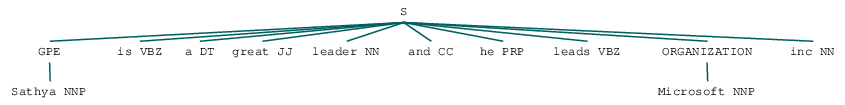

In [ ]:
import nltk 
#sentence = """At eight o'clock on Thursday 
#morning Arthur didn't feel very good."""

#sentence="Rajesh travelled to Ladak, he had a great travel experience"
sentence="Sathya leads Microsoft inc"
sentence="Sathya is a great leader and he leads Microsoft inc"

#sentence="John leads Microsoft inc"


tokens = nltk.word_tokenize(sentence)
tagged = nltk.pos_tag(tokens)
entities = nltk.chunk.ne_chunk(tagged)
entities

In [ ]:
?nltk.chunk.ne_chunk

Signature: nltk.chunk.ne_chunk(tagged_tokens, binary=False)
Docstring:
Use NLTK's currently recommended named entity chunker to
chunk the given list of tagged tokens.
File:      ~/.local/lib/python3.6/site-packages/nltk/chunk/__init__.py
Type:      function


# Case Study: Sentiment Analysis

Raw data

https://goo.gl/1Bxhns

### Data Prep

In [ ]:
import pandas as pd
import numpy as np

# Read in the data
df = pd.read_csv('Amazon_Unlocked_Mobile.csv')
#print(len(df))
# Sample the data to speed up computation
# Comment out this line to match with lecture
df = df.sample(frac=0.1,  random_state=10)
#print(len(df))

df.head()

,Product Name,Brand Name,Price,Rating,Reviews,Review Votes
394349,Sony XPERIA Z2 D6503 FACTORY UNLOCKED Internat...,NaN,244.95,5,Very good one! Better than Samsung S and iphon...,0.0
34377,Apple iPhone 5c 8GB (Pink) - Verizon Wireless,Apple,194.99,1,"The phone needed a SIM card, would have been n...",1.0
248521,Motorola Droid RAZR MAXX XT912 M Verizon Smart...,Motorola,174.99,5,I was 3 months away from my upgrade and my Str...,3.0
167661,CNPGD [U.S. Office Extended Warranty] Smartwat...,CNPGD,49.99,1,an experience i want to forget,0.0
73287,Apple iPhone 7 Unlocked Phone 256 GB - US Vers...,Apple,922.00,5,GREAT PHONE WORK ACCORDING MY EXPECTATIONS.,1.0


In [ ]:
#df.to_csv("~/temp.csv")

In [ ]:
df[df['Rating'] != 3]

,Product Name,Brand Name,Price,Rating,Reviews,Review Votes
394349,Sony XPERIA Z2 D6503 FACTORY UNLOCKED Internat...,NaN,244.95,5,Very good one! Better than Samsung S and iphon...,0.0
34377,Apple iPhone 5c 8GB (Pink) - Verizon Wireless,Apple,194.99,1,"The phone needed a SIM card, would have been n...",1.0
248521,Motorola Droid RAZR MAXX XT912 M Verizon Smart...,Motorola,174.99,5,I was 3 months away from my upgrade and my Str...,3.0
167661,CNPGD [U.S. Office Extended Warranty] Smartwat...,CNPGD,49.99,1,an experience i want to forget,0.0
73287,Apple iPhone 7 Unlocked Phone 256 GB - US Vers...,Apple,922.00,5,GREAT PHONE WORK ACCORDING MY EXPECTATIONS.,1.0
277158,Nokia N8 Unlocked GSM Touch Screen Phone Featu...,Nokia,95.00,5,I fell in love with this phone because it did ...,0.0
100311,Blackberry Torch 2 9810 Unlocked Phone with 1....,BlackBerry,77.49,5,I am pleased with this Blackberry phone! The p...,0.0
251669,Motorola Moto E (1st Generation) - Black - 4 G...,Motorola,89.99,5,"Great product, best value for money smartphone...",0.0
374058,Samsung Galaxy S7 Edge SM-G935F 32GB Factory U...,NaN,593.50,4,except samsung pay everything is good,0.0
279878,OtterBox 77-29864 Defender Series Hybrid Case ...,OtterBox,9.99,5,I've bought 3 no problems. Fast delivery.,0.0


In [ ]:
# Drop missing values
df.dropna(inplace=True)

# Remove any 'neutral' ratings equal to 3
df = df[df['Rating'] != 3]

# Encode 4s and 5s as 1 (rated positively)
# Encode 1s and 2s as 0 (rated poorly)
df['Positively Rated'] = np.where(df['Rating'] > 3, 1, 0)
df.head(10)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


,Product Name,Brand Name,Price,Rating,Reviews,Review Votes,Positively Rated
34377,Apple iPhone 5c 8GB (Pink) - Verizon Wireless,Apple,194.99,1,"The phone needed a SIM card, would have been n...",1.0,0
248521,Motorola Droid RAZR MAXX XT912 M Verizon Smart...,Motorola,174.99,5,I was 3 months away from my upgrade and my Str...,3.0,1
167661,CNPGD [U.S. Office Extended Warranty] Smartwat...,CNPGD,49.99,1,an experience i want to forget,0.0,0
73287,Apple iPhone 7 Unlocked Phone 256 GB - US Vers...,Apple,922.00,5,GREAT PHONE WORK ACCORDING MY EXPECTATIONS.,1.0,1
277158,Nokia N8 Unlocked GSM Touch Screen Phone Featu...,Nokia,95.00,5,I fell in love with this phone because it did ...,0.0,1
100311,Blackberry Torch 2 9810 Unlocked Phone with 1....,BlackBerry,77.49,5,I am pleased with this Blackberry phone! The p...,0.0,1
251669,Motorola Moto E (1st Generation) - Black - 4 G...,Motorola,89.99,5,"Great product, best value for money smartphone...",0.0,1
279878,OtterBox 77-29864 Defender Series Hybrid Case ...,OtterBox,9.99,5,I've bought 3 no problems. Fast delivery.,0.0,1
406017,Verizon HTC Rezound 4G Android Smarphone - 8MP...,HTC,74.99,4,Great phone for the price...,0.0,1
302567,"RCA M1 Unlocked Cell Phone, Dual Sim, 5Mp Came...",RCA,159.99,5,My mom is not good with new technoloy but this...,4.0,1


In [ ]:
# Most ratings are positive
df['Positively Rated'].mean()

0.7471776686078667

In [ ]:
from sklearn.model_selection import train_test_split

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(df['Reviews'], 
                                                    df['Positively Rated'], 
                                                    random_state=0)

In [ ]:
len(df)

30737

In [ ]:
30737*.75

23052.75

In [ ]:
print('X_train first entry:\n\n', X_train.iloc[0])
print('\n\nX_train shape: ', X_train.shape)

X_train first entry:

 Everything about it is awesome!


X_train shape:  (23052,)


# CountVectorizer

In [ ]:
import sklearn
import pandas as pd
import numpy as np

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

# Fit the CountVectorizer to the training data
vect = CountVectorizer().fit(X_train)

In [ ]:
vect

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=None, min_df=1,
                ngram_range=(1, 1), preprocessor=None, stop_words=None,
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)

In [ ]:
vect.get_feature_names()[::2000]

['00',
 'arroja',
 'comapañias',
 'dvds',
 'golden',
 'lands',
 'oil',
 'razonable',
 'smallsliver',
 'tweak']

In [ ]:
#len([ x for x in vect.get_feature_names() if x.islower()])

In [ ]:
len(vect.get_feature_names())

19601

In [ ]:
# transform the documents in the training data to a document-term matrix
X_train_vectorized = vect.transform(X_train)

X_train_vectorized

<23052x19601 sparse matrix of type '<class 'numpy.int64'>'
	with 613289 stored elements in Compressed Sparse Row format>

In [ ]:

from sklearn.linear_model import LogisticRegression

# Train the model
model = LogisticRegression(solver="liblinear")
model.fit(X_train_vectorized, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
from sklearn.metrics import roc_auc_score

# Predict the transformed test documents
predictions = model.predict(vect.transform(X_test))

print('AUC: ', roc_auc_score(y_test, predictions))

AUC:  0.8974332776669326


In [ ]:
# get the feature names as numpy array
feature_names = np.array(vect.get_feature_names())

# Sort the coefficients from the model
sorted_coef_index = model.coef_[0].argsort()

# Find the 10 smallest and 10 largest coefficients
# The 10 largest coefficients are being indexed using [:-11:-1] 
# so the list returned is in order of largest to smallest
print('Smallest Coefs:\n{}\n'.format(feature_names[sorted_coef_index[:10]]))
print('Largest Coefs: \n{}'.format(feature_names[sorted_coef_index[:-11:-1]]))

Smallest Coefs:
['not' 'slow' 'disappointed' 'worst' 'terrible' 'never' 'return' 'doesn'
 'horrible' 'waste']

Largest Coefs: 
['great' 'love' 'excellent' 'good' 'best' 'perfect' 'price' 'awesome'
 'far' 'perfectly']


In [ ]:
 np.sort(model.coef_[0])[:10]

array([-8.71296322, -4.98955843, -4.30238244, -4.15276932, -4.0598151 ,
       -4.00002566, -3.98630362, -3.8958822 , -3.73920797, -3.70796643])

In [ ]:
 np.sort(model.coef_[0])[:-11:-1]

array([10.1015186 ,  8.17068868,  5.97349197,  5.41103357,  5.34284637,
        5.28926342,  4.61077643,  4.47882299,  4.39019126,  4.16128828])

# Tfidf

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Fit the TfidfVectorizer to the training data specifiying a minimum document frequency of 5
vect = TfidfVectorizer(min_df=5).fit(X_train)
len(vect.get_feature_names())

5442

In [ ]:
#? TfidfVectorizer

In [ ]:
X_train_vectorized = vect.transform(X_train)

model = LogisticRegression()
model.fit(X_train_vectorized, y_train)

predictions = model.predict(vect.transform(X_test))

print('AUC: ', roc_auc_score(y_test, predictions))

AUC:  0.889951006492175


In [ ]:
feature_names = np.array(vect.get_feature_names())

sorted_tfidf_index = X_train_vectorized.max(0).toarray()[0].argsort()

print('Smallest tfidf:\n{}\n'.format(feature_names[sorted_tfidf_index[:10]]))
print('Largest tfidf: \n{}'.format(feature_names[sorted_tfidf_index[:-11:-1]]))

Smallest tfidf:
['61' 'printer' 'approach' 'adjustment' 'consequences' 'length' 'emailing'
 'degrees' 'handsfree' 'chipset']

Largest tfidf: 
['unlocked' 'handy' 'useless' 'cheat' 'up' 'original' 'exelent' 'exelente'
 'exellent' 'satisfied']


In [ ]:
sorted_coef_index = model.coef_[0].argsort()

print('Smallest Coefs:\n{}\n'.format(feature_names[sorted_coef_index[:10]]))
print('Largest Coefs: \n{}'.format(feature_names[sorted_coef_index[:-11:-1]]))

Smallest Coefs:
['not' 'slow' 'disappointed' 'worst' 'terrible' 'never' 'return' 'doesn'
 'horrible' 'waste']

Largest Coefs: 
['great' 'love' 'excellent' 'good' 'best' 'perfect' 'price' 'awesome'
 'far' 'perfectly']


In [ ]:
# These reviews are treated the same by our current model
print(model.predict(vect.transform(['not an issue, phone is working',
                                    'an issue, phone is not working'])))

[0 0]


# n-grams

In [ ]:
# Fit the CountVectorizer to the training data specifiying a minimum 
# document frequency of 5 and extracting 1-grams and 2-grams
vect = CountVectorizer(min_df=5, ngram_range=(1,2)).fit(X_train)

X_train_vectorized = vect.transform(X_train)

len(vect.get_feature_names())

29072

In [ ]:
model = LogisticRegression(solver="liblinear")
model.fit(X_train_vectorized, y_train)

predictions = model.predict(vect.transform(X_test))

print('AUC: ', roc_auc_score(y_test, predictions))

AUC:  0.9110661794597458


In [ ]:
feature_names = np.array(vect.get_feature_names())

sorted_coef_index = model.coef_[0].argsort()

print('Smallest Coefs:\n{}\n'.format(feature_names[sorted_coef_index[:10]]))
print('Largest Coefs: \n{}'.format(feature_names[sorted_coef_index[:-11:-1]]))

Smallest Coefs:
['no good' 'junk' 'poor' 'slow' 'worst' 'broken' 'not good' 'terrible'
 'defective' 'horrible']

Largest Coefs: 
['excellent' 'excelente' 'excelent' 'perfect' 'great' 'love' 'awesome'
 'no problems' 'good' 'best']


In [ ]:
# These reviews are now correctly identified
print(model.predict(vect.transform(['not an issue, phone is working',
                                    'an issue, phone is not working'])))

[1 0]


In [ ]:
myDiction={"name": "john", "data": np.arange(100).reshape(20,5)}

In [ ]:
import pickle

In [ ]:
myfile=open("data.pkl", "wb")
pickle.dump(myDiction, myfile)

In [ ]:
myfile.close()

In [ ]:
!ls

Amazon_Unlocked_Mobile.csv
data.pkl
dates.txt
moby.txt
mygrammar.cfg
paraphrases.csv
spam.csv
temp.csv
textMining
TextMining_NLTK_Consolidated-Copy1.ipynb
TextMining_NLTK_Consolidated_ModifApril2019WithDataLink.ipynb
textMining.tar.gz
TM_Data
TM_Data.zip


In [ ]:
myfile=open("mymodel.pkl", "wb")
pickle.dump([model,vect], myfile)
myfile.close()



In [ ]:
from joblib import dump, load

In [ ]:
dump([model,vect], "modeVec.joblib")

['modeVec.joblib']

In [ ]:
model1, vec1=load("modeVec.joblib")

In [ ]:
mydata=np.arange(10)

In [ ]:
np.save(mydata, "mydata")

TypeError: expected str, bytes or os.PathLike object, not ndarray